# Evaluation Project 6 - Loan Application Status Prediction

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Dataframe Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

## EDA

In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains categorical and numerical data. Categorical data will need to be encoded for the purpose of the prediction. Also, there is presence of null values, which will require imputation to fill up.

In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Findings:**
1. Counts are varying, implying presence of nulls.
2. Data in the columns is skewed, both right and left
3. Big differences in mean and standard deviations
4. Observing the max values with 75%, we can see the presence of outliers in the data

In [8]:
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Presence of null values in several columns

## Filling null values using mode, median etc.

In [11]:
print("Gender:",df["Gender"].mode())
print("Married:",df["Married"].mode())
print("Dependents",df["Dependents"].mode())
print("Credit_History",df["Credit_History"].mode())
print("Loan_Amount_Term",df["Loan_Amount_Term"].mode())
print("Self_Employed",df["Self_Employed"].mode())

Gender: 0    Male
dtype: object
Married: 0    Yes
dtype: object
Dependents 0    0
dtype: object
Credit_History 0    1.0
dtype: float64
Loan_Amount_Term 0    360.0
dtype: float64
Self_Employed 0    No
dtype: object


In [12]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [13]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Since LoanAmount still has null values, and its dtype is float, we can use median to fill the null values

In [14]:
df["LoanAmount"].median()

128.0

In [15]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have now fixed all the null values

**Our problem is a classification one, where in Loan Status, Y implies "loan approved" and N implies "loan rejected"**

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

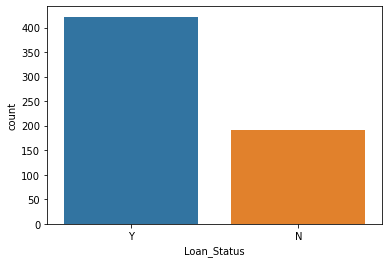

In [20]:
sns.countplot(df["Loan_Status"])
plt.show()

It is evident from above that there is data imbalance and will require to be fixed using SMOTE

## Separating categorical and numerical columns for the purpose of data analysis and visualization

In [18]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [19]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Data Visualization

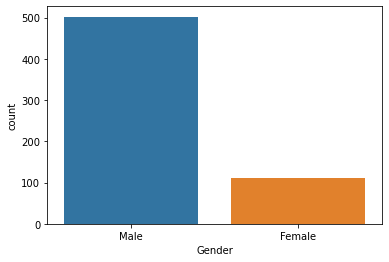

In [21]:
sns.countplot(df["Gender"])
plt.show()

There are more number of males applying for loans, as compared to females.

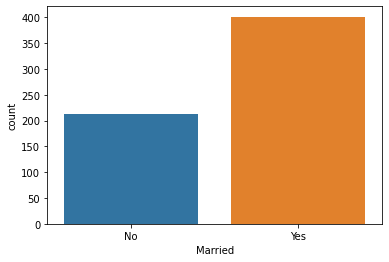

In [22]:
sns.countplot(df["Married"])
plt.show()

More married people are applying for loans

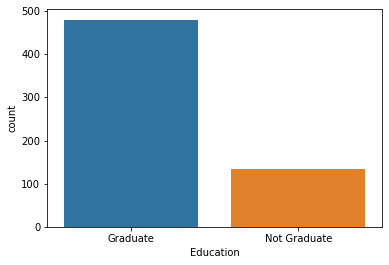

In [23]:
sns.countplot(df["Education"])
plt.show()

More number of graduates apply for loans, as compared to people who are not graduates

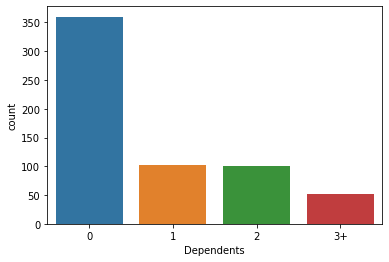

In [24]:
sns.countplot(df["Dependents"])
plt.show()

People who have no dependents apply for loans more than people with at least 1 dependent.

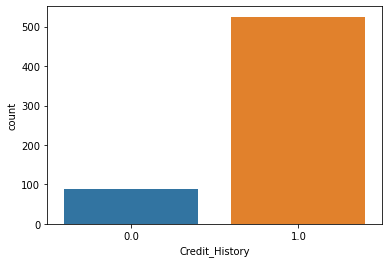

In [25]:
sns.countplot(df["Credit_History"])
plt.show()

People applying for loans with NO credit history are very low in comparison to those applying for loans with a credit history.

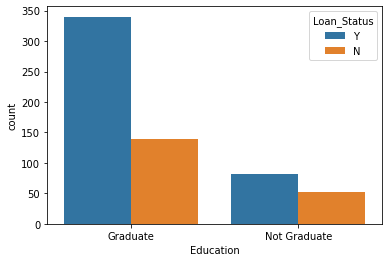

In [27]:
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

There are more Graduate applicants, and show a higher chance of loan approval. Comparatively, people who are not graduates have a higher chance of loan application rejection

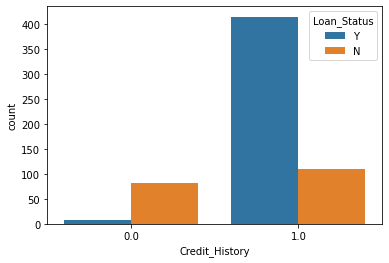

In [28]:
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

People with no credit history have a very low chance of loan application approval. However, applicants with the credit history have a very high chance of loan approval.

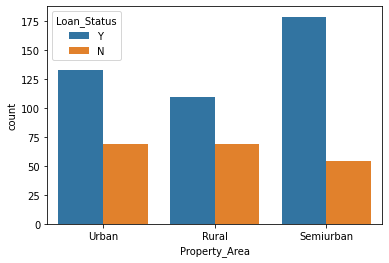

In [30]:
sns.countplot(df["Property_Area"],hue=df["Loan_Status"])
plt.show()

Most applicants belong to semi-urban areas, and have a very high loan approval chance, followed by urban, and then rural.

Male      502
Female    112
Name: Gender, dtype: int64


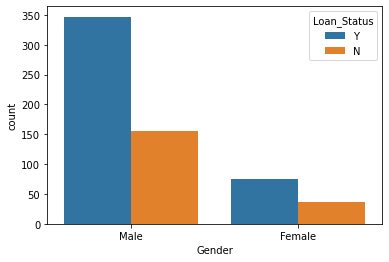

In [32]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

Most applicants are males, and also have a higher chance of loan approval, as out of 502 males applicants, approvals were given to about 350 applicants. The same ratio is clearly NOT evident in the case of females.

Yes    401
No     213
Name: Married, dtype: int64


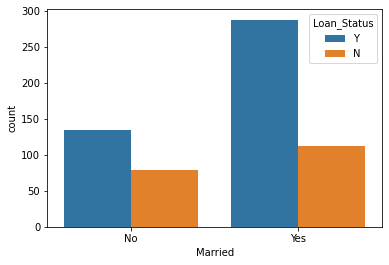

In [33]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"])
plt.show()

Most applications are received from people who are married, and also have a very chance of loan application approval. People who are unmarried have a higher chance of loan rejection, probably because of lack of co-signees on the loan applications

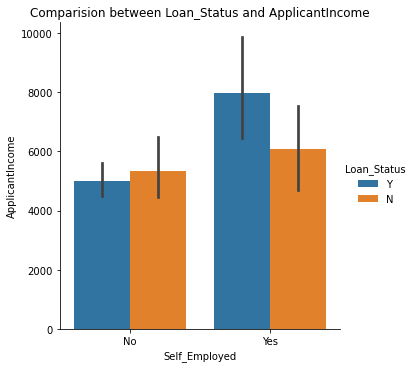

In [34]:
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status',)
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

Applicants with higher average income are higher in number, and have a higher chance of loan application approval.

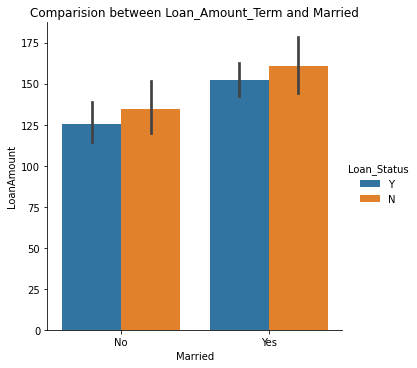

In [36]:
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

People who are married applying for average loan amounts have a higher potential for loan application approval

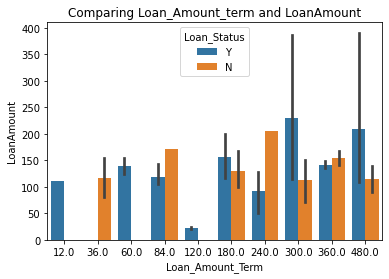

In [38]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

Loan amount terms of 300 are highest, with a high chance of approval. Loan amount term of 240 has a very chance of rejection. This could be result of several factors converging.

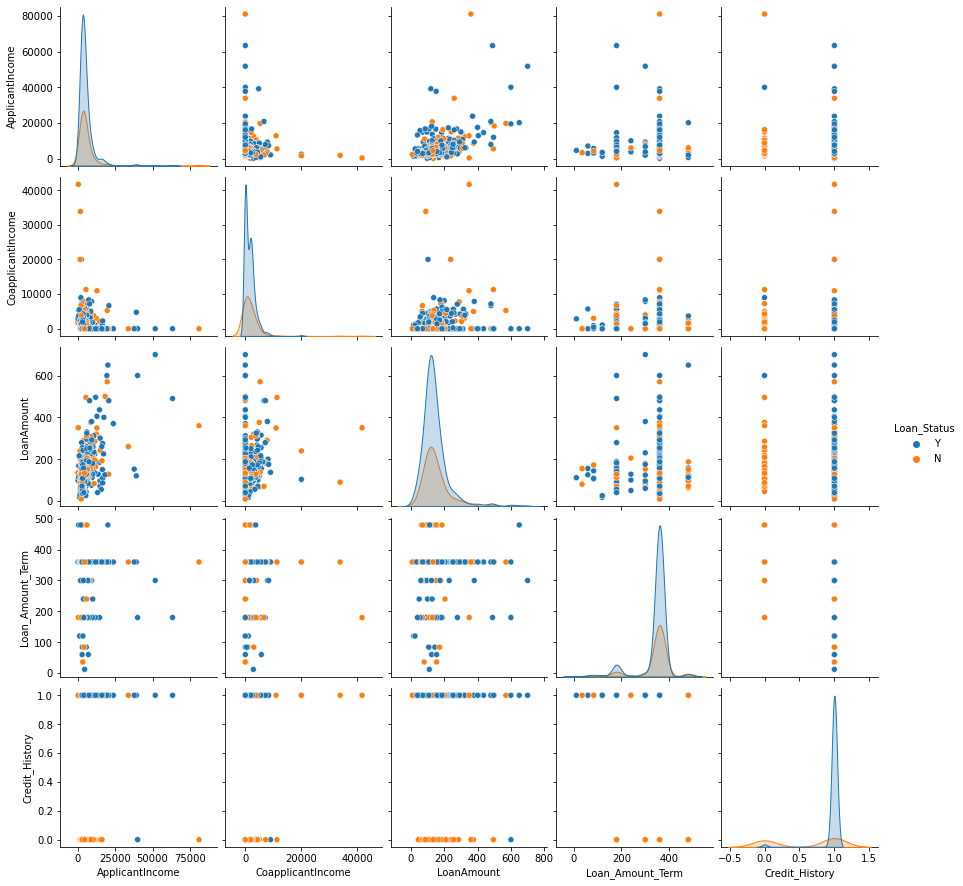

In [39]:
sns.pairplot(df,hue="Loan_Status")

**Findings:**
1. relationship between Loan_Status and other features is evident from the paidplot above.
2. ApplicantIncome shows a linear relationship with LoanAmount
3. CoapplicantIncome shows a linear relationship with LoanAmount
4. There is presence of outliers in some columns

## Outlier Check

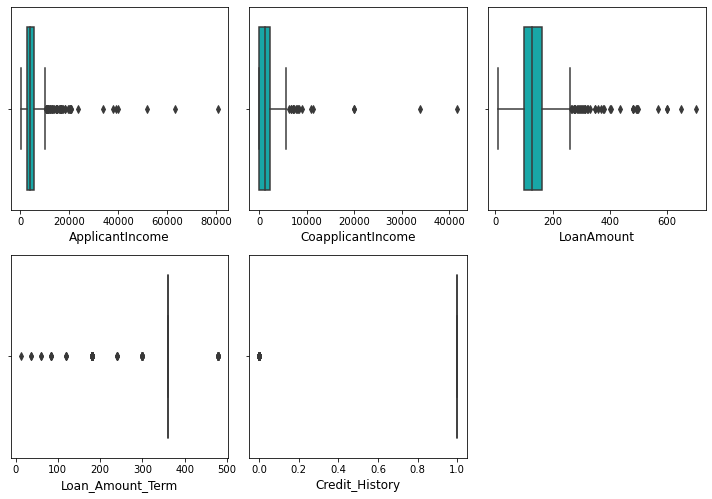

In [40]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Outliers are present in all numerical columns. Credit History is actually a categorical column, so we will not remove outliers from it

In [41]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [42]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
print(df.shape)
print(new_df.shape)

(614, 12)
(577, 12)


In [44]:
loss = (614-577)/614*100
loss

6.026058631921824

Data loss is 6%, which is acceptable

## Skewness Check

In [45]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [46]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = PowerTransformer(method='yeo-johnson')

In [48]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.693376,-1.114172,0.013122
1,0.258101,0.694668,0.013122
2,-0.511665,-1.114172,-1.452223
3,-0.786776,0.891216,-0.141640
4,0.738669,-1.114172,0.249719
...,...,...,...
609,-0.573900,-1.114172,-1.304099
610,0.060349,-1.114172,-2.382674
611,1.264438,0.021145,1.817498
612,1.153813,-1.114172,0.975381


In [49]:
new_df.skew()

ApplicantIncome     -0.246179
CoapplicantIncome   -0.150023
LoanAmount          -0.046722
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Skewness has been removed

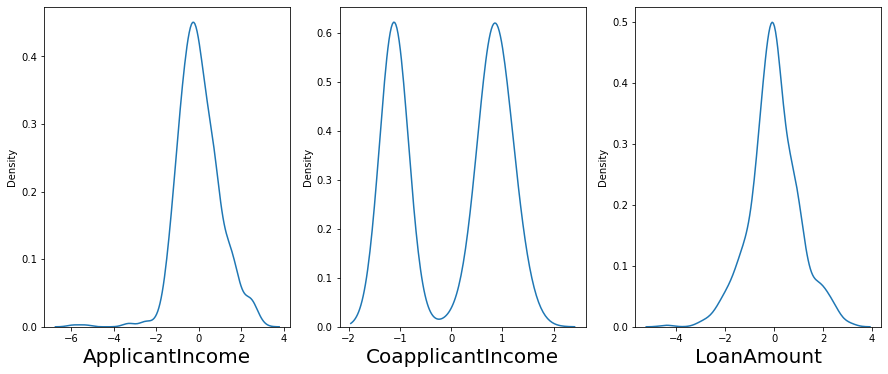

In [50]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Encoding Categorical Data

In [51]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [52]:
lbl = LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(lbl.fit_transform)

In [53]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


## Establishing Correlation

In [54]:
corr = new_df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.060636,0.233491,0.172828,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.026650,0.330783,0.182897,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.107059,-0.000019,0.131195,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.174333,0.043141,-0.126560,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.205735,-0.084446,0.116611,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060636,-0.026650,0.107059,-0.174333,0.205735,1.000000,-0.355630,0.424387,-0.070423,0.027369,-0.011176,-0.001801
CoapplicantIncome,0.233491,0.330783,-0.000019,0.043141,-0.084446,-0.355630,1.000000,0.212804,-0.003648,0.004703,-0.077148,0.076618
LoanAmount,0.172828,0.182897,0.131195,-0.126560,0.116611,0.424387,0.212804,1.000000,0.049798,-0.004831,-0.099574,-0.023034
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.070423,-0.003648,0.049798,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.027369,0.004703,-0.004831,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

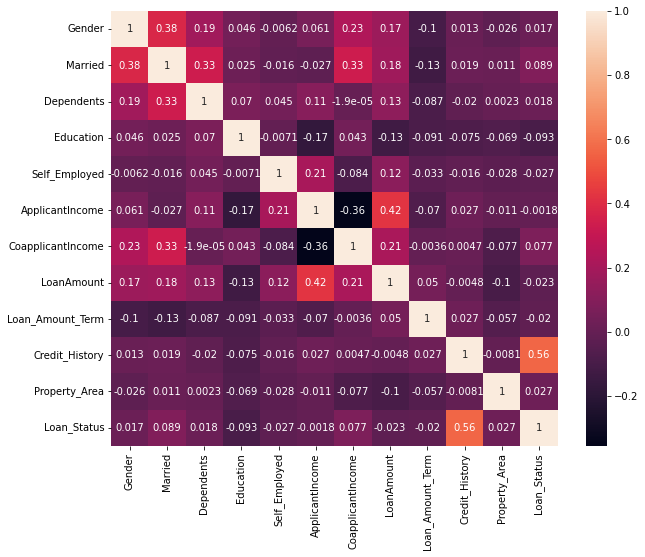

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),annot = True)

**Findings:**
1. High positive correlation between loan status and credit history
2. features have moderate correlation with each other
3. ApplicantIncome and Gender has very low correlation with the Loan_Status

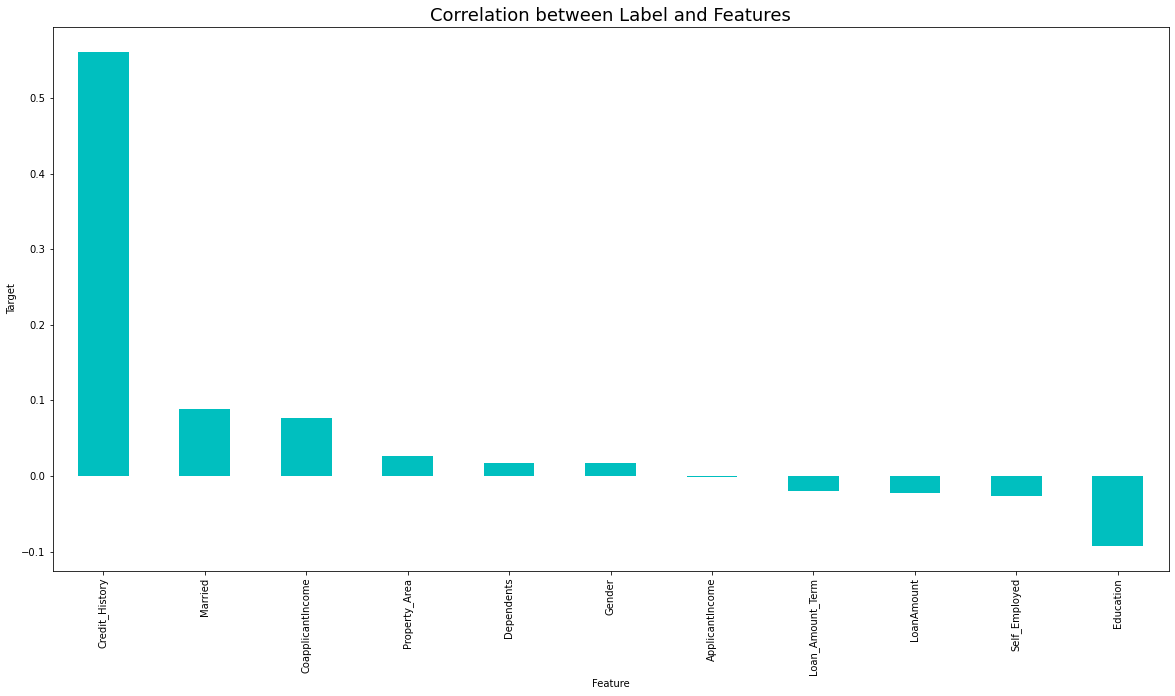

In [56]:
plt.figure(figsize=(20,10))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('Correlation between Label and Features',fontsize=18)
plt.show()

In [57]:
corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.076618
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.001801
Loan_Amount_Term    -0.020291
LoanAmount          -0.023034
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

## Splitting features and variables

In [58]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

## Using Standard Scaler

In [59]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.693376,-1.114172,0.013122,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.258101,0.694668,0.013122,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.511665,-1.114172,-1.452223,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.786776,0.891216,-0.141640,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.738669,-1.114172,0.249719,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.573900,-1.114172,-1.304099,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.060349,-1.114172,-2.382674,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.264438,0.021145,1.817498,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.153813,-1.114172,0.975381,0.230853,0.418513,1.227472


Data has been scaled

## Data Imbalance - Class

In [60]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [61]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [62]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [63]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.693376,-1.114172,0.013122,360.0,1.0,2,1
1,1,1,1,0,0,0.258101,0.694668,0.013122,360.0,1.0,0,0
2,1,1,0,0,1,-0.511665,-1.114172,-1.452223,360.0,1.0,2,1
3,1,1,0,1,0,-0.786776,0.891216,-0.141640,360.0,1.0,2,1
4,1,0,0,0,0,0.738669,-1.114172,0.249719,360.0,1.0,2,1


## Model Building

In [65]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," at Random_state ",maxRS)

Best accuracy is  0.9125  at Random_state  13


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = maxRS)

In [67]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.79375
[[65 14]
 [19 62]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        79
           1       0.82      0.77      0.79        81

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.80      0.79      0.79       160



In [68]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.91875
[[72  7]
 [ 6 75]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        79
           1       0.91      0.93      0.92        81

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160



In [69]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.75625
[[50 29]
 [10 71]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        79
           1       0.71      0.88      0.78        81

    accuracy                           0.76       160
   macro avg       0.77      0.75      0.75       160
weighted avg       0.77      0.76      0.75       160



In [70]:
# Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.73125
[[54 25]
 [18 63]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.72        79
           1       0.72      0.78      0.75        81

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.73      0.73      0.73       160



## Model Cross Validation

In [72]:
print("Cross Validation Score for Decision Tree Classifier:",cross_val_score(DTC,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for Random Forest Classifier:",cross_val_score(RFC,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for Logistic Regression:",cross_val_score(LR,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for SVC:",cross_val_score(svc,x,y,cv=5).mean())

Cross Validation Score for Decision Tree Classifier: 0.7752122641509434 

Cross Validation Score for Random Forest Classifier: 0.8481053459119497 

Cross Validation Score for Logistic Regression: 0.717374213836478 

Cross Validation Score for SVC: 0.7449999999999999


## Differences between Accuracy Score and CVS

1. DTC = 1.5%
2. RF = 7.2%
3. LR = 4.3%
4. SVC = 1.4%

It appears SVC is the best model

## Hyperparameter Tuning

In [73]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','poly', 'rbf', 'sigmoid'],
              'decision_function_shape':['ovo', 'ovr']}

In [74]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

The best parameters after 3 runs were as follows:
- C = 10
- decision_function_shape = ovo
- gamma = 1
- kernel = rbf

In [75]:
best_mod = SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='rbf')
best_mod.fit(x_train, y_train)
pred = best_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.5


After tuning, accuracy has increased from 73% to 82.5%, which is a great score for a classification model with limited data.

## ROC - AUC

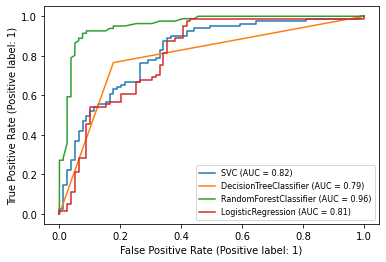

In [78]:
disp = plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

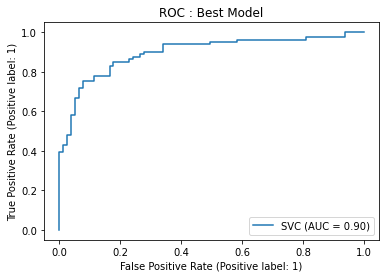

In [79]:
plot_roc_curve(best_mod, x_test, y_test)
plt.title("ROC : Best Model")
plt.show()

AUC for the Best Model is 90%

## Saving the model

In [81]:
joblib.dump(best_mod,"Loan_Application_Status_Prediction.pkl")

['Loan_Application_Status_Prediction.pkl']

In [82]:
model=joblib.load("Loan_Application_Status_Prediction.pkl")

In [83]:
prediction = model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0])

In [84]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,1,1,0,0,0,1,1,0,1,0,...,1,1,1,0,0,1,1,1,0,0
Original,1,1,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,1,1,0,0


# `END`